In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import pandas as pd
from scipy.optimize import curve_fit
import numpy.polynomial.polynomial as poly
import emcee
import corner
from scipy.optimize import minimize
from IPython.display import display, Math
import matplotlib as mpl
from multiprocessing.pool import Pool
from mcmc_functions import *
import pickle
import h5py
import glob
import os

In [2]:
# SAVE_DIR = './mcmc_fp_results/'

In [3]:
# sn20ano = pd.read_csv('./cleaning/outputs/sn20ano_cleaned_binned_cut.csv')
# sn20ano['JD'] = sn20ano['mjd']+2400000.5
# sn20ano['mag_err_all'] = sn20ano['err']
# df_str = 'sn20ano'

# # def find_a2(df_cut):
# #     plt.figure(figsize=(10,8))
# #     plt.scatter(df_cut['JD'], df_cut['mag'],s=10)
# #     for i in range(len(df_cut['JD'])):
# #         plt.text(np.array(df_cut['JD'])[i], np.array(df_cut['mag'])[i], str(i),fontsize=10)
# #     # plt.gca().invert_yaxis()
# #     plt.ylim(23,17)

# # find_a2(sn20ano)
# a2_ind = 36 #jk it should be 33

# norm_LC_a2(sn20ano, a2_ind)

# sn20ano_sub,a2 = subselect(sn20ano)

# gband = (sn20ano_sub['filter']=='ZTF_g')
# cband = (sn20ano_sub['filter']=='c')
# rband = (sn20ano_sub['filter']=='ZTF_r')
# oband = (sn20ano_sub['filter']=='o')
# dets = (sn20ano_sub['mag_err_all']<9000)
# nondets = (sn20ano_sub['mag_err_all']>9000)

# plt.figure()
# plt.errorbar(sn20ano_sub.loc[gband&dets,'norm_t'],sn20ano_sub.loc[gband&dets,'norm_m'],sn20ano_sub.loc[gband&dets,'mag_err_all'],
#              label='ZTF_g',color='green',ls='',marker='o')
# plt.errorbar(sn20ano_sub.loc[rband&dets,'norm_t'],sn20ano_sub.loc[rband&dets,'norm_m'],sn20ano_sub.loc[rband&dets,'mag_err_all'],
#              label='ZTF_r',color='red',ls='',marker='o')
# plt.errorbar(sn20ano_sub.loc[cband&dets,'norm_t'],sn20ano_sub.loc[cband&dets,'norm_m'],sn20ano_sub.loc[cband&dets,'mag_err_all'],
#              label='c',color='cyan',ls='',marker='o')
# plt.errorbar(sn20ano_sub.loc[oband&dets,'norm_t'],sn20ano_sub.loc[oband&dets,'norm_m'],sn20ano_sub.loc[oband&dets,'mag_err_all'],
#              label='o',color='orange',ls='',marker='o')
# plt.scatter(sn20ano_sub.loc[(gband|cband)&nondets,'norm_t'], sn20ano_sub.loc[(gband|cband)&nondets,'norm_m'],
#             marker='v',facecolor='cyan', edgecolor='green', label='g+c')
# plt.scatter(sn20ano_sub.loc[(rband|oband)&nondets,'norm_t'], sn20ano_sub.loc[(rband|oband)&nondets,'norm_m'],
#             marker='v',facecolor='orange', edgecolor='red', label='r+o')
# plt.legend(ncol=2)
# plt.gca().invert_yaxis()
# plt.title("Cleaned+Binned 2020ano")
# plt.xlabel('Normalized Time [days]')
# plt.ylabel('Normalized Mag')
# plt.show()

# r1_bool_dict = {
#         "g": {"sn20ano":False},
#         "r": {"sn20ano":True}
# }

# pdict = calc_prior(sn20ano_sub, r1_g=r1_bool_dict['g'][df_str], r1_r=r1_bool_dict['r'][df_str])

# p0 = p0_calc(pdict)
# g_p0 = p0[0]
# r_p0 = p0[1]


# df_strs = [df_str]
# df_subs = [sn20ano_sub]
# r1_g_bools = [r1_bool_dict['g'][df_str]]
# gp0s = [g_p0]
# pdicts = [pdict]

# # R BAND FITS
# # create method to run subset of sample
# rp0s = [r_p0]
# r1_r_bools = [r1_bool_dict['r'][df_str]]

# def run_mcmc(run=False, g=False, r=False, date='month00'):
#     if run:
#         print(f"RUNNING MCMC")
#         if g:
#             pool=Pool(len(df_strs))
#             inputs = zip(df_strs, df_subs, ['g']*len(df_subs), r1_g_bools, gp0s, pdicts)
#             all_fits_g = []

#             with open(SAVE_DIR+'bestfits_g_'+date+'.txt', 'a') as savefile:
#                 for fit in pool.map(mp_fit_sne, inputs):
#                     np.savetxt(savefile,fit)
#                     all_fits_g.append(fit)
#             pool.close()
#             savefile.close()
        
#         if r:
#             # R BAND FITS
#             pool=Pool(len(df_strs))
#             inputs = zip(df_strs, df_subs, ['r']*len(df_subs), r1_r_bools, rp0s, pdicts)
#             all_fits_r = []

#             with open(SAVE_DIR+'bestfits_r_'+date+'.txt', 'a') as savefile:
#                 for fit in pool.map(mp_fit_sne, inputs):
#                     np.savetxt(savefile,fit)
#                     all_fits_r.append(fit)
#             pool.close()
#             savefile.close()
#     else:
#         print(f"NOT running MCMC")
#     return

# run_mcmc(run=True, g=True, r=True, date='june28')

In [4]:
# read in the data (df created in fp jupyter notebook)
snztf18 = pd.read_csv('./data/forced_phot_data/snztf18_ztf_atlas_df.csv',index_col='index')
sn19rwd = pd.read_csv('./data/forced_phot_data/sn19rwd_ztf_atlas_df.csv',index_col='index')
sn20bio = pd.read_csv('./data/forced_phot_data/sn20bio_ztf_atlas_df.csv',index_col='index')
sn21gno = pd.read_csv('./data/forced_phot_data/sn21gno_ztf_atlas_df.csv',index_col='index')
sn21heh = pd.read_csv('./data/forced_phot_data/sn21heh_ztf_atlas_df.csv',index_col='index')
sn21vgn = pd.read_csv('./data/forced_phot_data/sn21vgn_ztf_atlas_df.csv',index_col='index')
sn22hnt = pd.read_csv('./data/forced_phot_data/sn22hnt_ztf_atlas_df.csv',index_col='index')
sn22jpx = pd.read_csv('./data/forced_phot_data/sn22jpx_ztf_atlas_df.csv',index_col='index')
sn22qzr = pd.read_csv('./data/forced_phot_data/sn22qzr_ztf_atlas_df.csv',index_col='index')
# # added later
sn20ano = pd.read_csv('./data/forced_phot_data/sn20ano_ztf_atlas_df.csv', index_col='index')
sn20ikq = pd.read_csv('./data/forced_phot_data/sn20ikq_ztf_atlas_df.csv', index_col='index')
sn20rsc = pd.read_csv('./data/forced_phot_data/sn20rsc_ztf_atlas_df.csv', index_col='index')
sn21pb =  pd.read_csv('./data/forced_phot_data/sn21pb_ztf_atlas_df.csv', index_col='index')

df_list = [snztf18,sn19rwd,sn20ano,sn20bio,sn20ikq,sn20rsc,sn21gno,sn21heh,
           sn21pb, sn21vgn,sn22hnt,sn22jpx,sn22qzr]
df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21gno','sn21heh',
               'sn21pb', 'sn21vgn','sn22hnt','sn22jpx','sn22qzr']
# df_list = [sn20ano, sn20ikq, sn20rsc]
# df_str_list = ['sn20ano', 'sn20ikq', 'sn20rsc']

sn20ano.columns

Index(['JD', 'filter', 'mag', 'ztf_mag_lower', 'ztf_mag_upper',
       'atlas_mag_err', 'data_origin'],
      dtype='object')

In [5]:
for i,df in enumerate(df_list):
    convert_ztf_err(df)
    merge_err_cols(df)

In [6]:
# cut down the data
#df_str_list = ['snztf18','sn19rwd','sn20ano','sn20bio','sn20ikq','sn20rsc','sn21aezx','sn21gno','sn21heh','sn21vgn','sn22hnt','sn22jpx','sn22qzr']
#taken from forced_phot_nb
xlims_jd_ls = [[25+2.4582e6, 55+2.4582e6], [760+2.458e6, 800+2.458e6], [869+2.458e6,910+2.458e6],[2458875.5, 2458920.5], 
               [-35+2.459e6,20+2.459e6], [78+2.459e6,110+2.459e6], [290+2.459e6, 320+2.459e6], 
               [2459290.5, 2459340.5], [18+2.4592e6, 55+2.4592e6], [2459430.5, 2459480.5], [2459680.5, 2459730.5], 
               [2459706.5, 2459740.5], [799+2.459e6, 875+2.459e6]]

snztf18_cut = slice_df(snztf18,xlims_jd_ls[0])
sn19rwd_cut = slice_df(sn19rwd,xlims_jd_ls[1])
sn20ano_cut = slice_df(sn20ano,xlims_jd_ls[2])
sn20bio_cut = slice_df(sn20bio,xlims_jd_ls[3])
sn20ikq_cut = slice_df(sn20ikq,xlims_jd_ls[4])
sn20rsc_cut = slice_df(sn20rsc,xlims_jd_ls[5])
sn21gno_cut = slice_df(sn21gno,xlims_jd_ls[6])
sn21heh_cut = slice_df(sn21heh,xlims_jd_ls[7])
sn21pb_cut = slice_df(sn21pb, xlims_jd_ls[8])
sn21vgn_cut = slice_df(sn21vgn,xlims_jd_ls[9])
sn22hnt_cut = slice_df(sn22hnt,xlims_jd_ls[10])
sn22jpx_cut = slice_df(sn22jpx,xlims_jd_ls[11])
sn22qzr_cut = slice_df(sn22qzr,xlims_jd_ls[12])

df_cut_list = [snztf18_cut,sn19rwd_cut,sn20ano_cut,sn20bio_cut,sn20ikq_cut,sn20rsc_cut,sn21gno_cut,
               sn21heh_cut,sn21pb_cut,sn21vgn_cut,sn22hnt_cut,sn22jpx_cut,sn22qzr_cut]

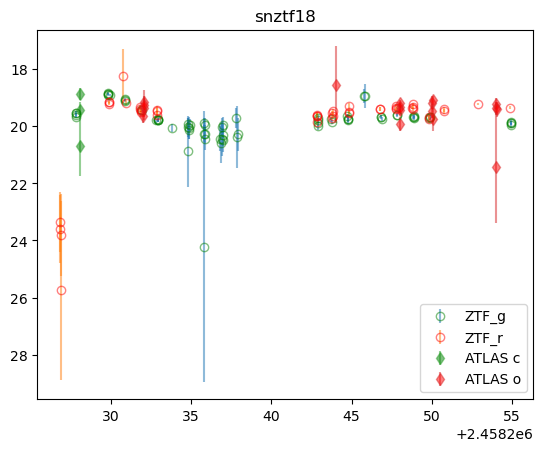

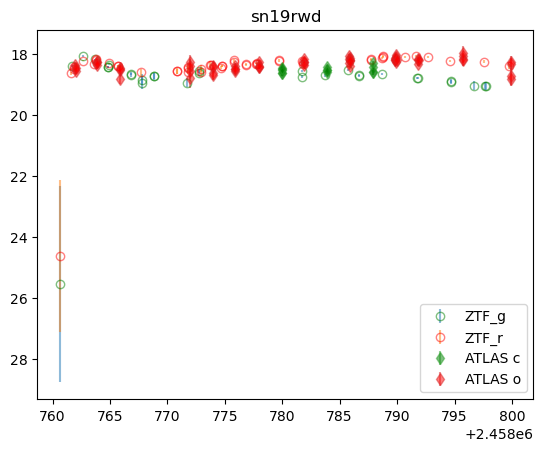

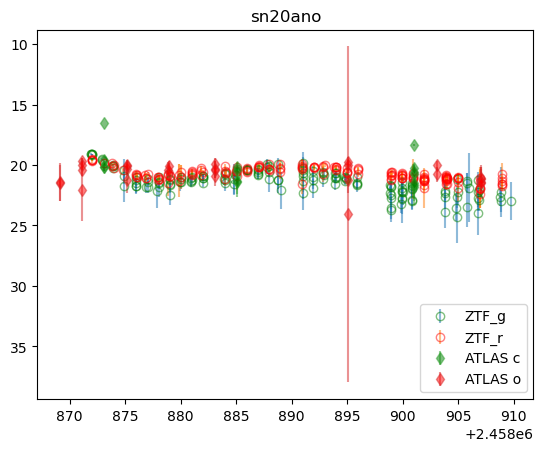

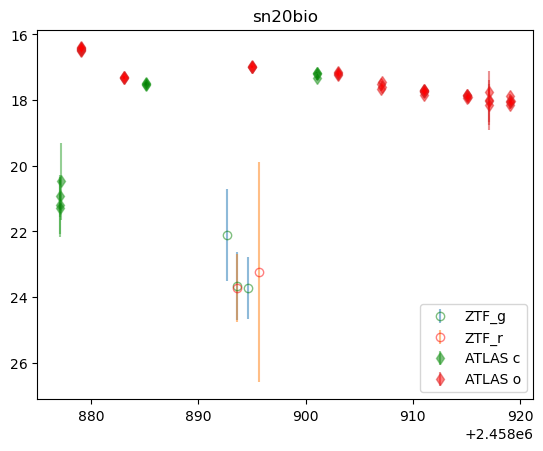

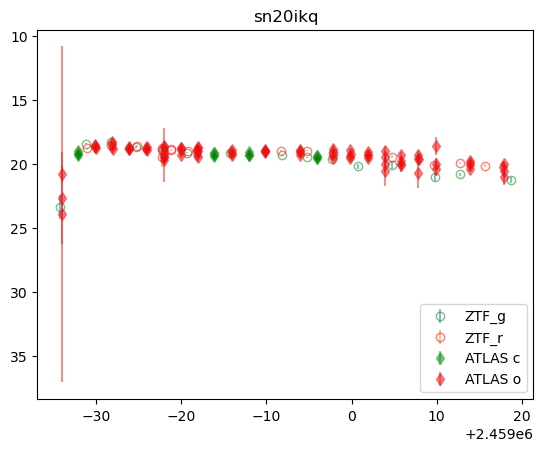

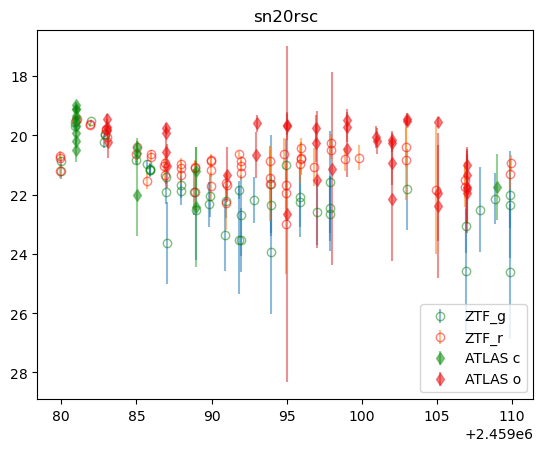

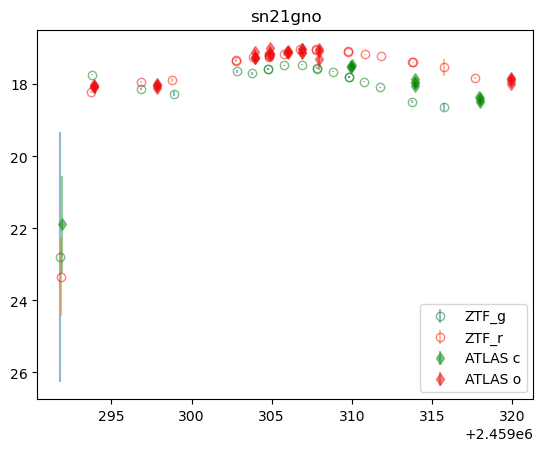

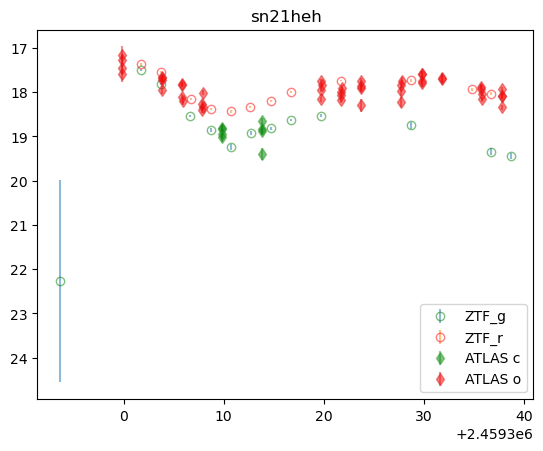

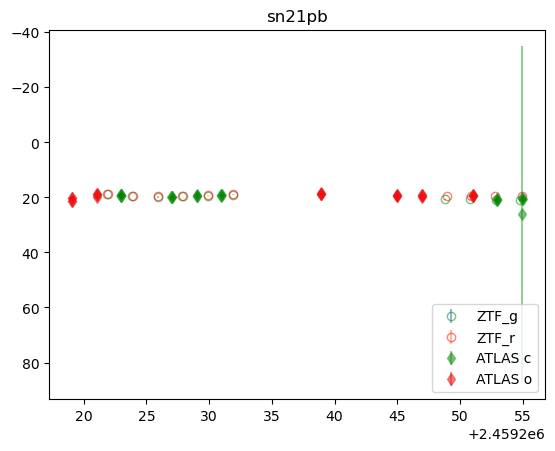

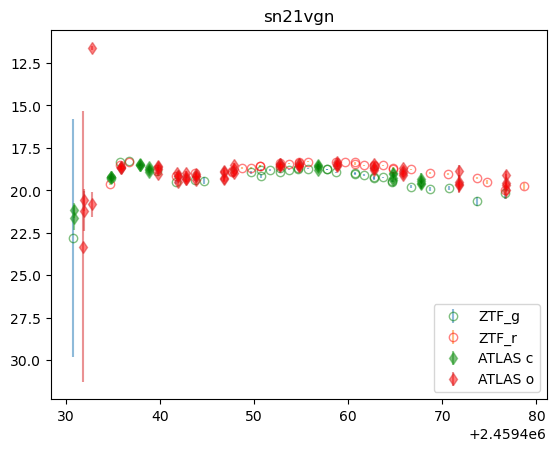

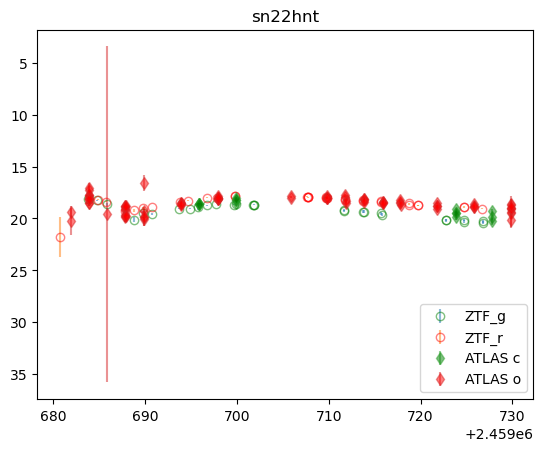

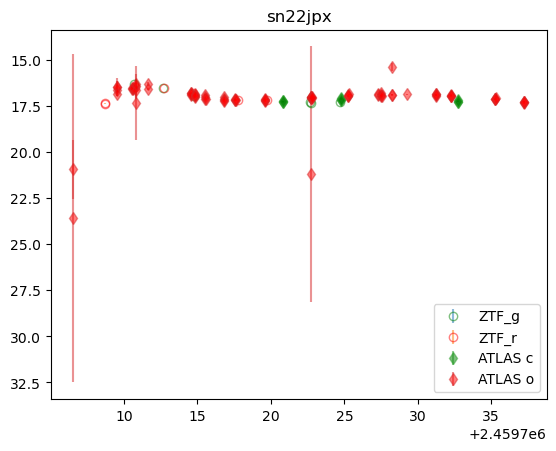

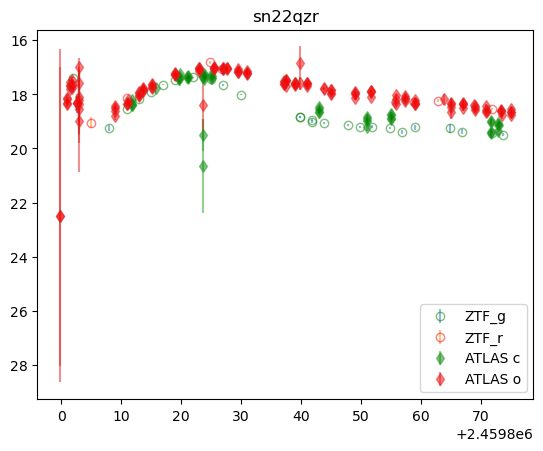

In [7]:
%matplotlib inline
for i,df in enumerate(df_cut_list):
    plt.figure()
    plt.errorbar(df[df['filter']=='ZTF_g']['JD'], df[df['filter']=='ZTF_g']['mag'],df[df['filter']=='ZTF_g']['mag_err_all'],
                 marker='o',ls='',mec='green',mfc='none',label='ZTF_g',alpha=0.5)
    plt.errorbar(df[df['filter']=='ZTF_r']['JD'], df[df['filter']=='ZTF_r']['mag'],df[df['filter']=='ZTF_r']['mag_err_all'],
                 marker='o',ls='',mec='red',mfc='none',label='ZTF_r',alpha=0.5)
    plt.errorbar(df[df['filter']=='c']['JD'], df[df['filter']=='c']['mag'],df[df['filter']=='c']['mag_err_all'],
                 mfc='green', ls='',marker='d',label='ATLAS c',alpha=0.5)
    plt.errorbar(df[df['filter']=='o']['JD'], df[df['filter']=='o']['mag'],df[df['filter']=='o']['mag_err_all'],
                 mfc='red', ls='',marker='d', label='ATLAS o',alpha=0.5)
    plt.gca().invert_yaxis()
    # plt.ylim(0,30)
    plt.legend(loc='lower right')
    plt.title(df_str_list[i])


In [8]:
# %matplotlib qt
# def find_a2(df_cut):
#     plt.figure(figsize=(10,8))
#     plt.scatter(df_cut['JD'], df_cut['mag'],s=10)
#     for i in range(len(df_cut['JD'])):
#         plt.text(np.array(df_cut['JD'])[i], np.array(df_cut['mag'])[i], str(i),fontsize=10)
#     # plt.gca().invert_yaxis()
#     plt.ylim(23,17)

# for i,df in enumerate(df_cut_list):
#     find_a2(df)
#     plt.title(df_str_list[i])

#indeces FROM ARRAY (not df index) from visual inspection, no filter differentiation
a2_inds = [52, 25, 68, 22,73,27, 9, 10, 
           37, 116, 11, 51, 2]

In [9]:
#actually normalizing the LCs to a2

for i,df in enumerate(df_cut_list):
    norm_LC_a2(df, a2_inds[i])

JD @ a2 =  2458236.8568866
JD @ a2 =  2458768.8084491
JD @ a2 =  2458877.9690046
JD @ a2 =  2458885.095686
JD @ a2 =  2458981.89003
JD @ a2 =  2459085.9696875
JD @ a2 =  2459298.8947569
JD @ a2 =  2459310.7228241
JD @ a2 =  2459227.012787
JD @ a2 =  2459443.808147
JD @ a2 =  2459689.7834028
JD @ a2 =  2459719.590462
JD @ a2 =  2459807.898125


In [10]:
# run subselect func
snztf18_sub,a0 = subselect(df_cut_list[0])
sn19rwd_sub,a1 = subselect(df_cut_list[1])
sn20ano_sub,a2 = subselect(df_cut_list[2])
sn20bio_sub,a3 = subselect(df_cut_list[3])
sn20ikq_sub,a4 = subselect(df_cut_list[4])
sn20rsc_sub,a5 = subselect(df_cut_list[5])
sn21gno_sub,a6 = subselect(df_cut_list[6])
sn21heh_sub,a7 = subselect(df_cut_list[7])
sn21pb_sub,a8 = subselect(df_cut_list[8])
sn21vgn_sub,a9 = subselect(df_cut_list[9])
sn22hnt_sub,a10 = subselect(df_cut_list[10])
sn22jpx_sub,a11 = subselect(df_cut_list[11])
sn22qzr_sub,a12 = subselect(df_cut_list[12])

df_sub_ls = [snztf18_sub,sn19rwd_sub,sn20ano_sub,sn20bio_sub,sn20ikq_sub,sn20rsc_sub,sn21gno_sub,sn21heh_sub,
             sn21pb_sub,sn21vgn_sub,sn22hnt_sub,sn22jpx_sub,sn22qzr_sub]
new_a2_inds = [a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]

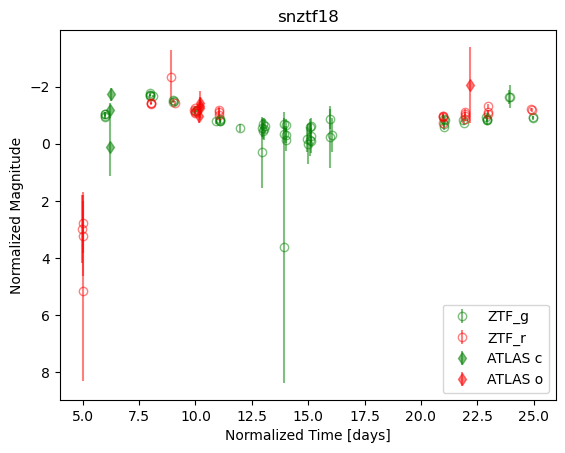

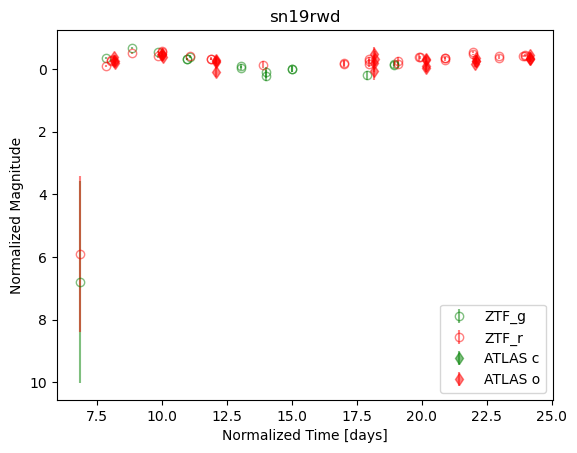

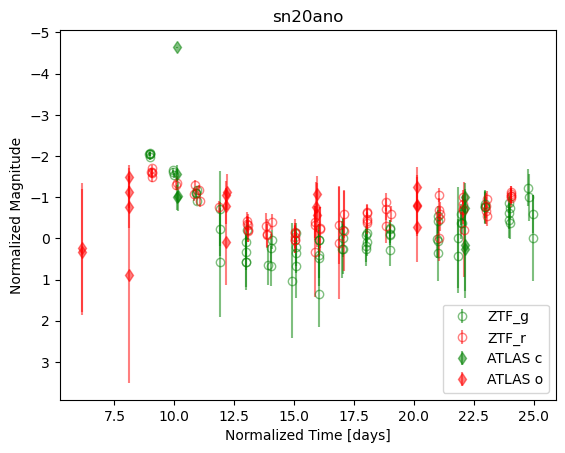

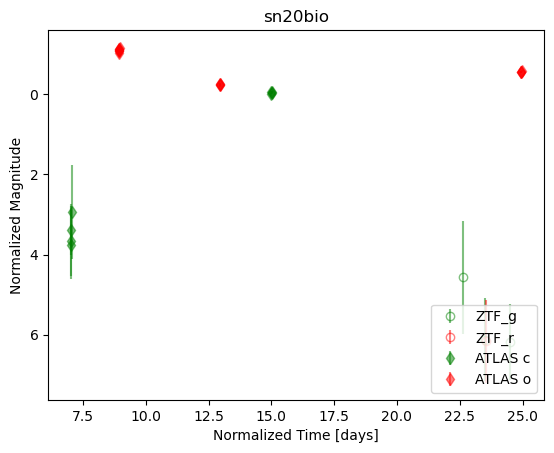

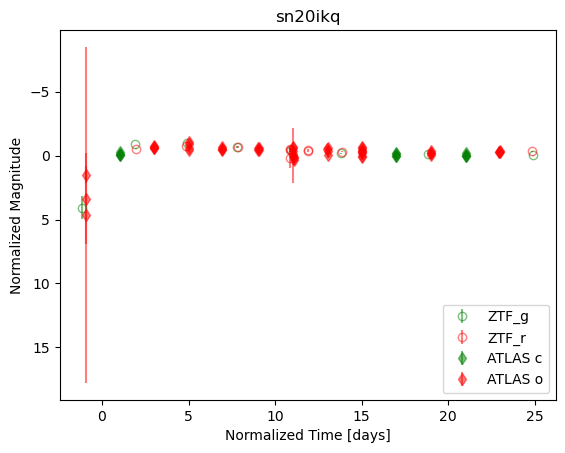

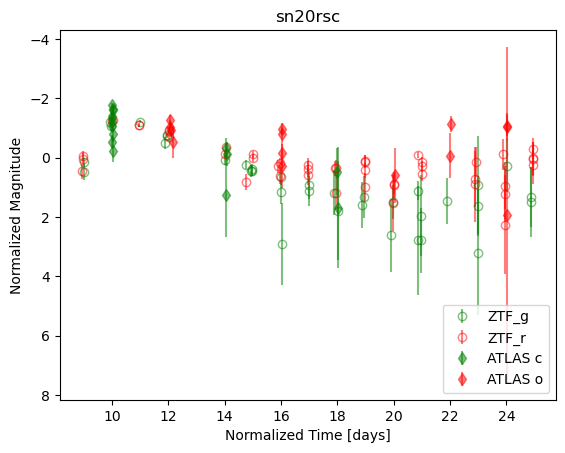

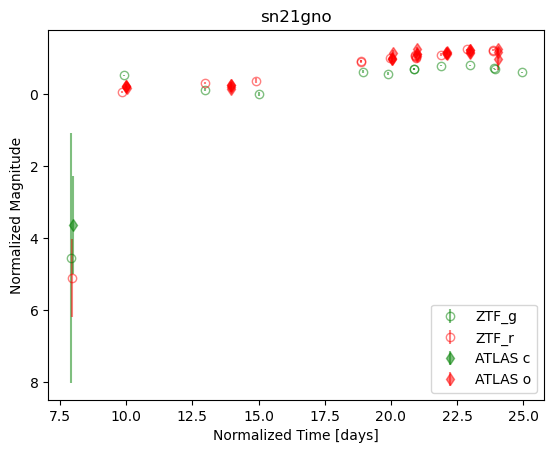

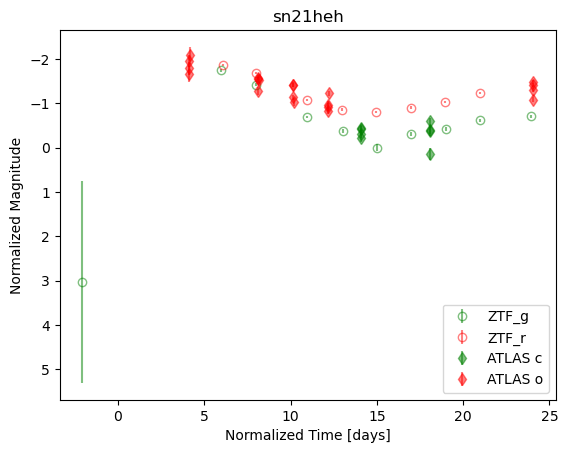

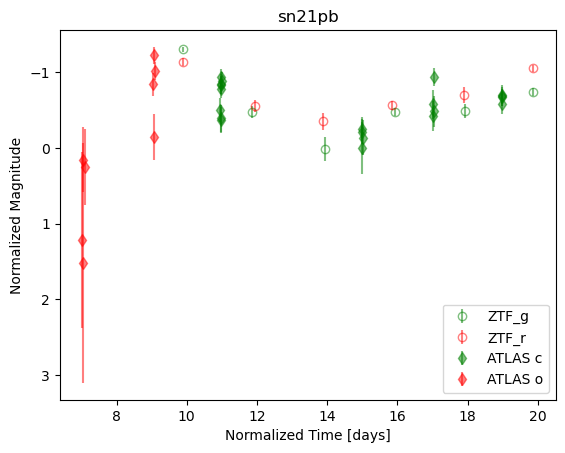

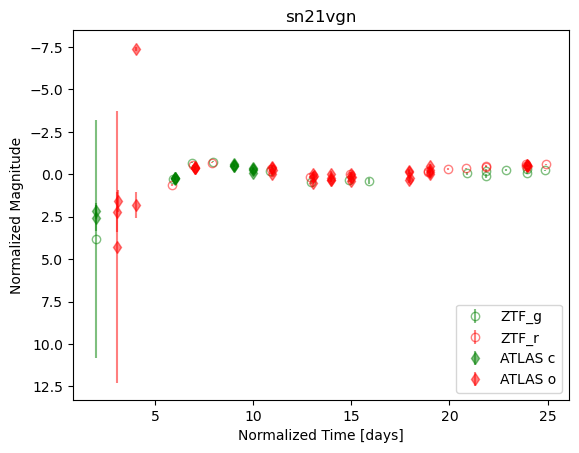

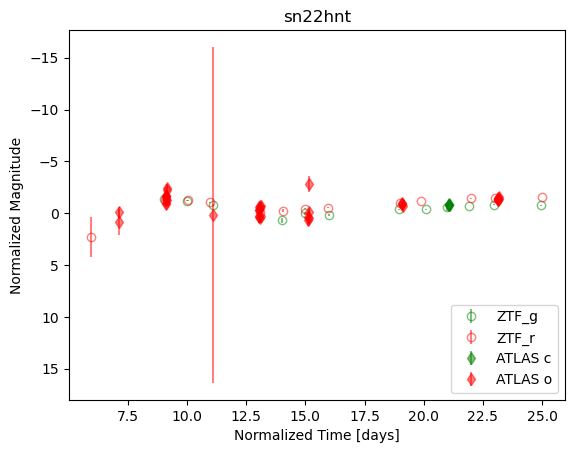

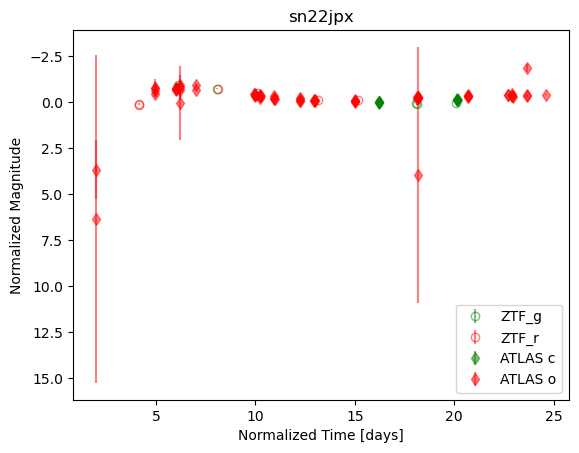

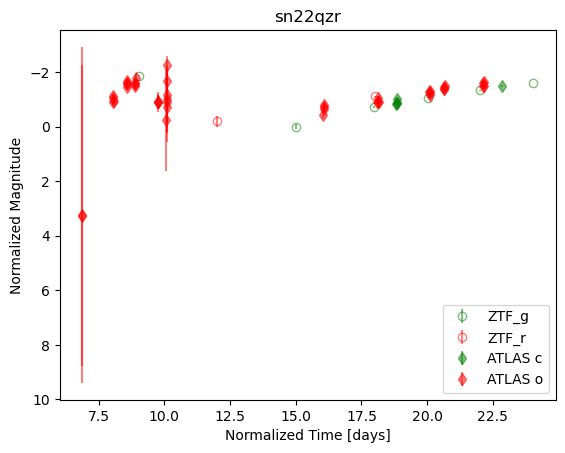

In [11]:
%matplotlib inline
for i,df in enumerate(df_sub_ls):
    plt.figure()
    plt.errorbar(df[df['filter']=='ZTF_g']['norm_t'], df[df['filter']=='ZTF_g']['norm_m'],df[df['filter']=='ZTF_g']['mag_err_all'],
                 markeredgecolor='green',markerfacecolor='none',ecolor='green',label='ZTF_g',alpha=0.5,linestyle='',marker='o')
    plt.errorbar(df[df['filter']=='ZTF_r']['norm_t'], df[df['filter']=='ZTF_r']['norm_m'],df[df['filter']=='ZTF_r']['mag_err_all'],
                 markeredgecolor='red',markerfacecolor='none',ecolor='red',label='ZTF_r',alpha=0.5,linestyle='',marker='o')
    plt.errorbar(df[df['filter']=='c']['norm_t'], df[df['filter']=='c']['norm_m'],df[df['filter']=='c']['mag_err_all'],
                 color='green', marker='d',label='ATLAS c',alpha=0.5,linestyle='')
    plt.errorbar(df[df['filter']=='o']['norm_t'], df[df['filter']=='o']['norm_m'],df[df['filter']=='o']['mag_err_all'],
                 color='red', marker='d', label='ATLAS o',alpha=0.5,linestyle='')
    plt.gca().invert_yaxis()
    plt.legend(loc='lower right')
    plt.title(df_str_list[i])
    plt.xlabel('Normalized Time [days]')
    plt.ylabel('Normalized Magnitude')


In [12]:
# def boolean list of rise1
r1_bool_dict = {
        "g": {"snztf18":True,
              "sn19rwd":True,
              "sn20bio":True,
              "sn21gno":True,
              "sn21heh":True,
              "sn21vgn":True,
              'sn22hnt':False,
              'sn22jpx':False,
              'sn22qzr':False,
              'sn20ano':True,
              'sn20ikq':True,
              'sn20rsc':True,
              'sn21pb':False},
        "r": {"snztf18":True,
              "sn19rwd":True,
              "sn20bio":True,
              "sn21gno":True,
              "sn21heh":True,
              "sn21vgn":True,
              'sn22hnt':True,
              'sn22jpx':True,
              'sn22qzr':True,
              'sn20ano':True,
              'sn20ikq':True,
              'sn20rsc':True,
              'sn21pb':True}
    }
r1_g_bools = r1_bool_dict['g'].values()
r1_r_bools = r1_bool_dict['r'].values()

In [13]:
# actually creating list of prior space limits
snztf18_pdict,sn19rwd_pdict,sn20ano_pdict,sn20bio_pdict,sn20ikq_pdict,sn20rsc_pdict,sn21gno_pdict,sn21pb_pdict,sn21heh_pdict,sn21vgn_pdict,sn22hnt_pdict,sn22jpx_pdict,sn22qzr_pdict=[],[],[],[],[],[],[],[],[],[],[],[],[]
temp_pdict = [snztf18_pdict,sn19rwd_pdict,sn20ano_pdict,sn20bio_pdict,sn20ikq_pdict,sn20rsc_pdict,sn21gno_pdict,sn21heh_pdict,sn21pb_pdict,sn21vgn_pdict,sn22hnt_pdict,sn22jpx_pdict,sn22qzr_pdict]

for i,sub in enumerate(df_sub_ls):
    # print('ON SNE', df_str_list[i])
    df_str = df_str_list[i]
    p = calc_prior(sub, r1_g=r1_bool_dict['g'][df_str], r1_r=r1_bool_dict['r'][df_str])
    temp_pdict[i].append(p) #applies extra 1st dimension

pdict_ls = [snztf18_pdict[0],sn19rwd_pdict[0],sn20ano_pdict[0],sn20bio_pdict[0],sn20ikq_pdict[0],sn20rsc_pdict[0],
            sn21gno_pdict[0],sn21heh_pdict[0],sn21pb_pdict[0], sn21vgn_pdict[0],sn22hnt_pdict[0],sn22jpx_pdict[0],sn22qzr_pdict[0]]

a1_g, lower upper: 5.976226799655706 12.959606499876827
a2_g, lower upper: 12.959606499876827 16.5
a1_r, lower upper: 4.981712899636477 11.024212900083512
a2_r, lower upper: 11.024212900083512 20.957604099996388 

a1_g, lower upper: 6.86876150034368 13.057245300151408
a2_g, lower upper: 13.057245300151408 17.885092600248754
a1_r, lower upper: 6.840046300087124 12.083327900152653
a2_r, lower upper: 12.083327900152653 17.99365740036592 

a1_g, lower upper: 8.942338000051677 12.97346070036292
a2_g, lower upper: 12.97346070036292 17.99998850002885
a1_r, lower upper: 6.156779400072992 12.1571254003793
a2_r, lower upper: 12.1571254003793 17.063321799971163 

a1_g, lower upper: 7.014510000124574 13.5
a2_g, lower upper: 13.5 16.5
a1_r, lower upper: 8.931084000039846 12.943601000122726
a2_r, lower upper: 12.943601000122726 23.526212099939585 

a1_g, lower upper: -1.1329234996810555 13.5
a2_g, lower upper: 13.5 16.980994999874383
a1_r, lower upper: -0.944726999849081 13.027420000173151
a2_r, low

In [ ]:
pdict_all = {
    'snztf18':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":5.976226799655706, "a1_u": 12.959606499876827,
            "a2_l":12.959606499876827, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":4.981712899636477, "a1_u":11.024212900083512,
            "a2_l":11.024212900083512, "a2_u":20.957604099996388,
            "log_f_l":-4.0,"log_f_u":4.0}
            },
    'sn19rwd':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":6.86876150034368, "a1_u": 13.057245300151408,
            "a2_l":13.057245300151408, "a2_u":17.885092600248754,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":6.840046300087124, "a1_u":12.083327900152653,
            "a2_l":12.083327900152653, "a2_u":17.99365740036592,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn20ano':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":8.942338000051677, "a1_u": 12.97346070036292,
            "a2_l":12.97346070036292, "a2_u":17.99998850002885,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":6.156779400072992, "a1_u":12.1571254003793,
            "a2_l":12.1571254003793, "a2_u":17.063321799971163,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn20bio':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":7.014510000124574, "a1_u": 13.5,
            "a2_l":13.5, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":8.931084000039846, "a1_u":12.943601000122726,
            "a2_l":12.943601000122726, "a2_u":23.526212099939585,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn20ikq':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":-1.1329234996810555, "a1_u": 13.5,
            "a2_l":13.5, "a2_u":16.980994999874383,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":-0.944726999849081, "a1_u":13.027420000173151,
            "a2_l":13.027420000173151, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn20rsc':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":9.000324099790305, "a1_u": 13.5,
            "a2_l":13.5, "a2_u":17.99203749978915,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":8.944236100185663, "a1_u":12.00540510006249,
            "a2_l":12.00540510006249, "a2_u":17.936087999958545,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn21gno':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":7.8987962999381125, "a1_u": 12.959537100046873,
            "a2_l":12.959537100046873, "a2_u":18.959502399899065,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":7.959467599634081, "a1_u":12.964421299751848,
            "a2_l":12.964421299751848, "a2_u":18.86081019975245,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn21heh':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":-2.069155099801719, "a1_u": 13.024780100211501,
            "a2_l":13.024780100211501, "a2_u":16.984375,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":4.12297789985314, "a1_u":12.151536900084466,
            "a2_l":12.151536900084466, "a2_u":16.949224499985576,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn21pb':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":9.383196800015867, "a1_u": 9.883196800015867,
            "a2_l":13.5, "a2_u":17.93128710007295,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":7.026162000373006, "a1_u":13.5,
            "a2_l":13.5, "a2_u":17.902143600396812,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn21vgn':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":1.9684039000421762, "a1_u": 12.935359899885952,
            "a2_l":12.935359899885952, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":3.0539090000092983, "a1_u":12.87760529993102,
            "a2_l":12.87760529993102, "a2_u":17.982155999634415,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn22hnt':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":8.511018499732018, "a1_u": 9.011018499732018,
            "a2_l":13.5, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":5.956030100118369, "a1_u":13.035427199676633,
            "a2_l":13.035427199676633, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn22jpx':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":5.58201489970088, "a1_u": 6.08201489970088,
            "a2_l":10.142385199666023, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":1.9527329998090863, "a1_u":12.217712000012398,
            "a2_l":12.217712000012398, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
    'sn22qzr':{"g": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.1,"m2_u":0.4,
            "m3_l":-0.25,"m3_u":0.0,
            "b2_l":-5.5,"b2_u":0.0,
            "a1_l":8.524236100260168, "a1_u": 9.024236100260168,
            "a2_l":9.024236100260168, "a2_u":17.986064800061285,
            "log_f_l":-4.0,"log_f_u":4.0},
        "r": {"m1_l":-2.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":0.4,
            "m3_l":-0.2,"m3_u":0.0,
            "b2_l":-5.0,"b2_u":0.0,
            "a1_l":6.87473600031808, "a1_u":12.010590299963951,
            "a2_l":12.010590299963951, "a2_u":16.5,
            "log_f_l":-4.0,"log_f_u":4.0}
    },
}

In [30]:
# run p0_calc
snztf18_p0,sn19rwd_p0,sn20ano_p0,sn20bio_p0,sn20ikq_p0,sn20rsc_p0,sn21gno_p0,sn21heh_p0,sn21pb_p0,sn21vgn_p0,sn22hnt_p0,sn22jpx_p0,sn22qzr_p0=[],[],[],[],[],[],[],[],[],[],[],[],[]
temp_p0s = [snztf18_p0,sn19rwd_p0,sn20ano_p0,sn20bio_p0,sn20ikq_p0,sn20rsc_p0,sn21gno_p0,sn21heh_p0,sn21pb_p0,sn21vgn_p0,sn22hnt_p0,sn22jpx_p0,sn22qzr_p0]

for i,pdict in enumerate(pdict_ls):
    p = p0_calc(pdict)
    temp_p0s[i].append(p) #applies extra 1st dimension

p0s = [snztf18_p0[0],sn19rwd_p0[0],sn20ano_p0[0],sn20bio_p0[0],sn20ikq_p0[0],sn20rsc_p0[0],sn21gno_p0[0],sn21heh_p0[0],sn21pb_p0[0],sn21vgn_p0[0],sn22hnt_p0[0],sn22jpx_p0[0],sn22qzr_p0[0]]

[[-1.0, 0.25, -0.125, -2.75, 9.467916649766266, 14.729803249938414, -2], [-1.0, 0.2, -0.1, -2.5, 8.002962899859995, 15.99090850003995, -2]]
[[-1.0, 0.25, -0.125, -2.75, 9.963003400247544, 15.47116895020008, -2], [-1.0, 0.2, -0.1, -2.5, 9.461687100119889, 15.038492650259286, -2]]
[[-1.0, 0.25, -0.125, -2.75, 10.957899350207299, 15.486724600195885, -2], [-1.0, 0.2, -0.1, -2.5, 9.156952400226146, 14.610223600175232, -2]]
[[-1.0, 0.25, -0.125, -2.75, 10.257255000062287, 15.0, -2], [-1.0, 0.2, -0.1, -2.5, 10.937342500081286, 18.234906550031155, -2]]
[[-1.0, 0.25, -0.125, -2.75, 6.183538250159472, 15.240497499937192, -2], [-1.0, 0.2, -0.1, -2.5, 6.041346500162035, 14.763710000086576, -2]]
[[-1.0, 0.25, -0.125, -2.75, 11.250162049895152, 15.746018749894574, -2], [-1.0, 0.2, -0.1, -2.5, 10.474820600124076, 14.970746550010517, -2]]
[[-1.0, 0.25, -0.125, -2.75, 9.376718799816445, 13.397789399838075, -2], [-1.0, 0.2, -0.1, -2.5, 9.430856499820948, 13.529903799761087, -2]]
[[-1.0, 0.25, -0.125, -2

In [31]:
#sep out initial guesses for multiproc
g_p0 = [p0s[i][0] for i in range(len(p0s))]
r_p0 = [p0s[i][1] for i in range(len(p0s))]

In [32]:
#write out the subselected dataframes for GP stuffs (?)
for i,df in enumerate(df_sub_ls):
    df.to_csv(SAVE_DIR+'subselected_dfs/'+df_str_list[i]+'.csv',index=False)

OSError: Cannot save file into a non-existent directory: '/DATA/pnr5sh/subselected_dfs'

In [18]:
##############################################
#
#    RUN ALL MCMC AND PLOT RESULTS
#
###############################################

In [ ]:
# create method to run subset of sample

df_strs = [df_str_list[2],df_str_list[4], df_str_list[5]]
df_subs = [df_sub_ls[2], df_sub_ls[4], df_sub_ls[5]]
r1_bools = [True,True,True]
gp0s = [g_p0[2],g_p0[4], g_p0[5]]
pdicts = [pdict_ls[2], pdict_ls[4], pdict_ls[5]]

pool=Pool(3)
inputs = zip(df_strs, df_subs, ['g']*len(df_subs), r1_bools, gp0s, pdicts)
all_fits_g = []

with open(SAVE_DIR+'bestfits_g_may1.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_g.append(fit)
pool.close()
savefile.close()

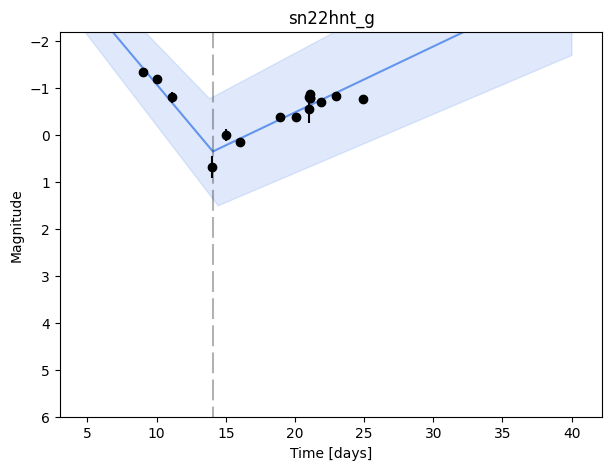

<Figure size 900x700 with 0 Axes>

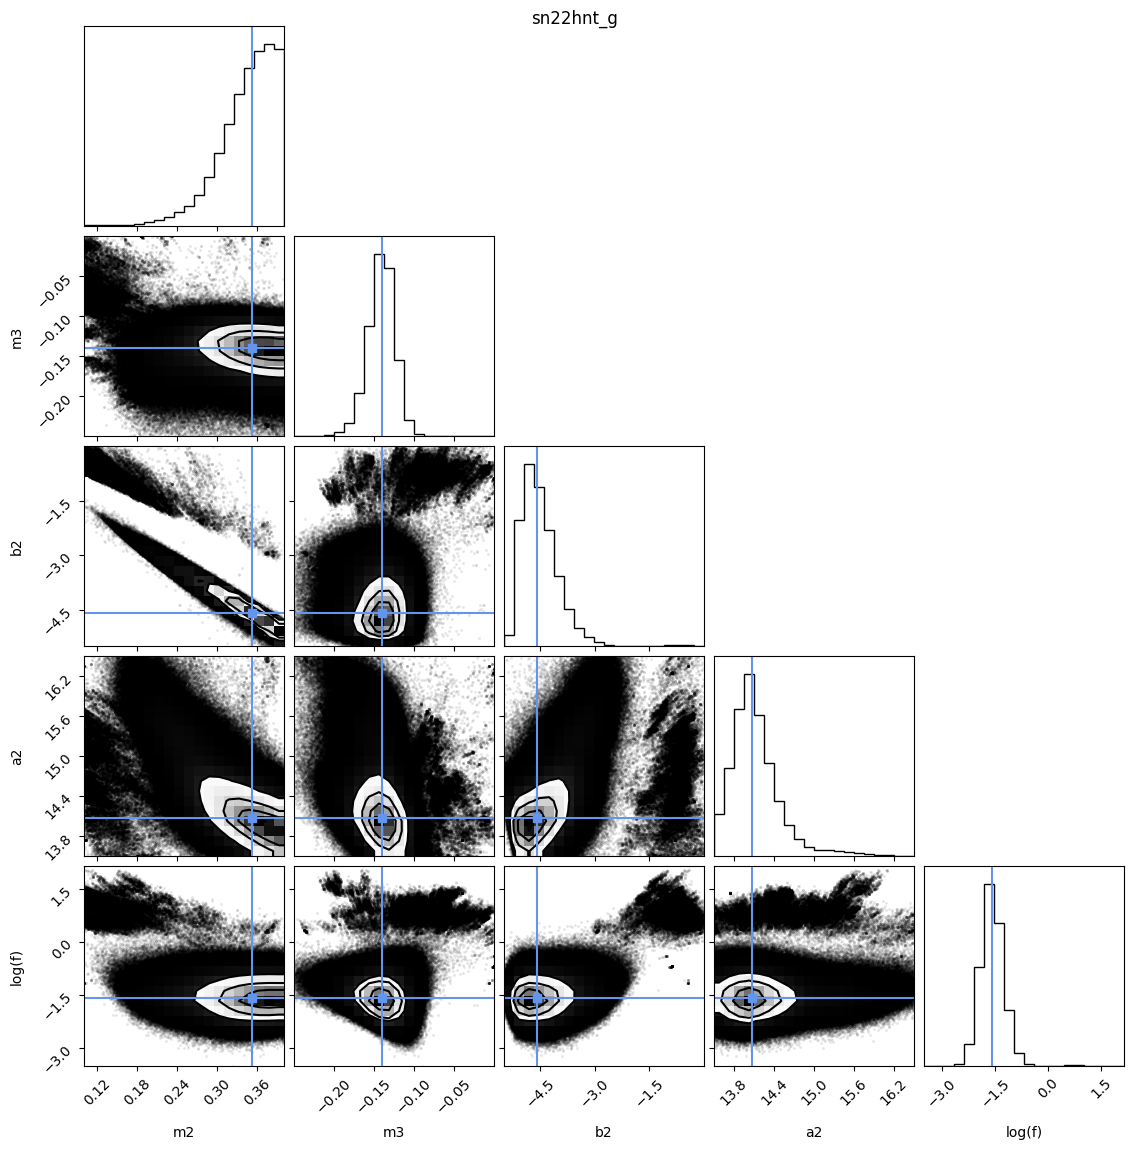

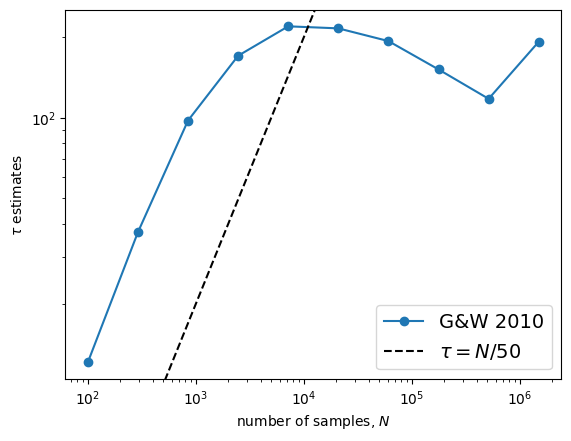

In [18]:
# DONT RERUN

# #just 22hnt_g band mcmc run, index 7
# # hnt_inputs = zip('22hnt_g',df_sub_ls[7],'g',r1_g_bools[7],g_p0[7],pdict_ls[7])

# g_df = df_sub_ls[7][(df_sub_ls[7]['filter']=='ZTF_g') | (df_sub_ls[7]['filter']=='c')]
# x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
# save_name = 'sn22hnt_g'

# #run mcmc and save bestfit results, chains.h5
# fit, mc = mcmc_fit(x, y, yerr, pdict_ls[7], p0=g_p0[7], r1=r1_g_bools[7], band='g', sn_name=save_name)

# #plot mcmc results
# plot_mcmc_results(x, y, yerr, fit, mc, r1=r1_g_bools[7], sn_band=save_name, save=True)

# #calc and plot autocorr values
# do_gw_autocorr_and_plot(mc, save_name)

In [38]:
# DONT RERUN

# g band multiproc

pool=Pool()
inputs = zip(df_str_list, df_sub_ls, ['g']*len(df_sub_ls), r1_g_bools, g_p0, pdict_ls)
all_fits_g = []

with open(SAVE_DIR+'bestfits_g_april22.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_g.append(fit)
pool.close()
savefile.close()

ON SN : ON SN :  sn20ikq
 sn20rsc
ON SN :  sn20ano


In [39]:
# DONT RERUN

# r band multiproc

pool=Pool(processes=5)
inputs = zip(df_str_list, df_sub_ls, ['r']*len(df_sub_ls), r1_r_bools, r_p0, pdict_ls)
all_fits_r = []

with open(SAVE_DIR+'bestfits_r_april22.txt', 'a') as savefile:
    for fit in pool.map(mp_fit_sne, inputs):
        np.savetxt(savefile,fit)
        all_fits_r.append(fit)
pool.close()

ON SN :  sn20ikq
ON SN :  sn20ano
ON SN :  sn20rsc


In [66]:
# RUN IF WANT TO CONVERT H5 CHAIN FILES TO FLAT CHAINS LOCALLY

# PATH_TO_G_CHAINS = '../ztf_IIb_data/mcmc_fp_results/mcmc_chains/g_chains/'
# PATH_TO_R_CHAINS = '../ztf_IIb_data/mcmc_fp_results/mcmc_chains/r_chains/'
# h5_2_txt(PATH_TO_R_CHAINS)

Working on sn21aezx
Working on snztf18
Working on sn21heh
Working on sn22qzr
Working on sn20bio


In [66]:
# if code crashes, reload the chains here to find bestfit
g_chains = []
r_chains = []
for i in range(len(df_str_list)):
    gf = SAVE_DIR+df_str_list[i]+'_g_flatchains.txt'
    rf = SAVE_DIR+df_str_list[i]+'_r_flatchains.txt'
    g_chains.append(gf)
    r_chains.append(rf)

def bestfit_recovery(filename, sub_df, band='', r1_bool=True, sn_id_band='test_g', replot=False):
    flat_samples = np.loadtxt(filename)
    if r1_bool:
        ndim = 7
    if not r1_bool:
        ndim = 5

    mcmc_results = []
    #retrieve the 16th/50th/84th percentile for each param and the lower/upper bounds on each
    for i in range(ndim):
        mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        arr = [mcmc[1], q[0], q[1]]
        mcmc_results.append(arr)

    # making fit/autocorr/corner plots
    if band == 'g':
        g_df = sub_df[(sub_df['filter']=='ZTF_g') | (sub_df['filter']=='c')]
        x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    if band == 'r':
        r_df = sub_df[(sub_df['filter']=='ZTF_r') | (sub_df['filter']=='o')]
        x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    if replot:
        plot_mcmc_results(x, y, yerr, mcmc_results, flat_samples, r1=r1_bool, sn_band=sn_id_band, save=True)
        do_gw_autocorr_and_plot(filename, sn_id_band)

    return mcmc_results#,flat_samples

In [67]:
all_fits_g = []
for i,file in enumerate(g_chains):
    fit = bestfit_recovery(file, df_sub_ls[i], band='g', r1_bool=r1_bool_dict['g'][df_str_list[i]],sn_id_band=df_str_list[i]+'_g')
    all_fits_g.append(fit)

In [68]:
all_fits_r = []
for i,file in enumerate(r_chains):
    fit = bestfit_recovery(file, df_sub_ls[i], band='r', r1_bool=r1_bool_dict['r'][df_str_list[i]],sn_id_band=df_str_list[i]+'_r')
    all_fits_r.append(fit)

In [101]:
# colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
colors = ['#8dd3c7','#ff7f00','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#6a3d9a','#bc80bd','#ccebc5','#ffed6f','#1f78b4']

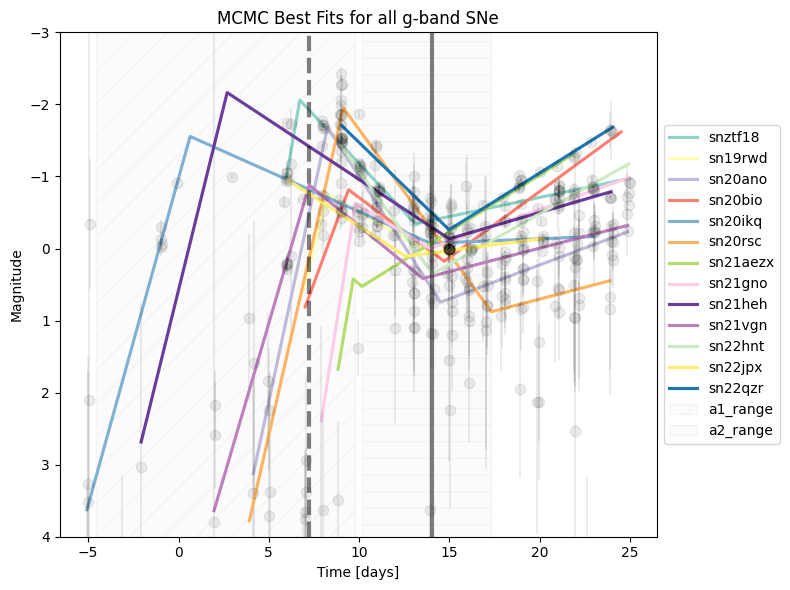

In [81]:
a1s,a2s = [],[]
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    g_df = df[(df['filter']=='ZTF_g') | (df['filter']=='c')]
    x_plt = np.arange(min(g_df['norm_t']),max(g_df['norm_t']),0.01)

    best = np.array(all_fits_g[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_g[i]).T[0] - np.array(all_fits_g[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_g[i]).T[0] + np.array(all_fits_g[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_g_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=1.0, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='gray', alpha=0.05)
    
    # #plotting ztf/atlas data
    x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color='black', alpha=0.075, label='data', markersize=15) #ztf errors

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.5, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=10)
plt.axvline(med_a2,alpha=0.5, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=10)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all g-band SNe')
plt.ylim(4,-3)
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_g_a12err_april23.png')
# plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_g_errband_april23.png')

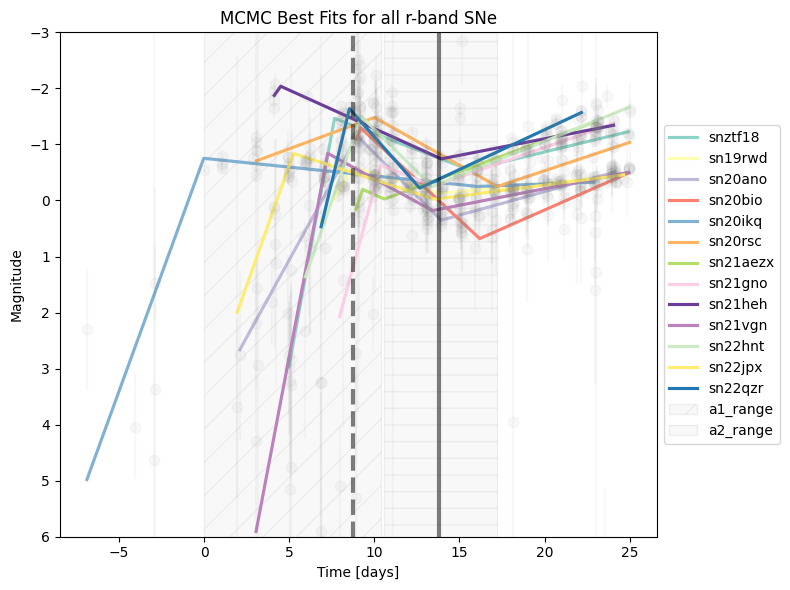

In [84]:
# x_plt = np.arange(1,40,0.01)
# colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']
# ls = ['solid', 'dotted', 'dashed', 'dashdot', (5, (10, 3)), (0, (3, 5, 1, 5))]

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    r_df = df[(df['filter']=='ZTF_r') | (df['filter']=='o')]
    x_plt = np.arange(min(r_df['norm_t']),max(r_df['norm_t']),0.01)

    best = np.array(all_fits_r[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_r[i]).T[0] - np.array(all_fits_r[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_r[i]).T[0] + np.array(all_fits_r[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_r_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=1.0, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.2)

    #plotting ztf data
    x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color='gray', alpha=0.05, label='data', markersize=15) #ztf errors, 

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.05, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.05, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.5, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=10)
plt.axvline(med_a2,alpha=0.5, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=10)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all r-band SNe')
plt.ylim(6,-3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_r_a12err_april23.png')
# plt.savefig(SAVE_DIR+'/figures/all_mcmc_fits_r_errband_april23.png')

In [85]:
# #the next two loops separate out the indivudal param values and append to list to do stats on them
# best_fits_g,best_fits_r = [],[]
# low_err_g, upp_err_g =[],[]
# low_err_r, upp_err_r =[],[]
# for i in range(len(all_fits_r)):
#     #g band
#     bestg = np.array(all_fits_g[i]).T[0]  #bestfit (50% ptile) values
#     lowg = np.array(all_fits_g[i]).T[1]   #lower bound, 16% ptile
#     highg =  np.array(all_fits_g[i]).T[2] #upper bound, 84% ptile
#     best_fits_g.append(bestg)
#     low_err_g.append(lowg)
#     upp_err_g.append(highg)

#     #r band
#     bestr = np.array(all_fits_r[i]).T[0]  #bestfit (50% ptile) values
#     lowr = np.array(all_fits_r[i]).T[1]   #lower bound, 16% ptile
#     highr =  np.array(all_fits_r[i]).T[2] #upper bound, 84% ptile
#     best_fits_r.append(bestr)
#     low_err_r.append(lowr)
#     upp_err_r.append(highr)

# # formatting and saving best fits values in g and r
# best_fits_g_same_len = []
# for i,arr in enumerate(best_fits_g):
#     if len(arr) == 5:
#         arr = np.insert(arr, [0,3], np.nan)
#     best_fits_g_same_len.append(arr)

# best_fits_r_same_len = []
# for i,arr in enumerate(best_fits_r):
#     if len(arr) == 5:
#         arr = np.insert(arr, [0,3], np.nan)
#     best_fits_r_same_len.append(arr)

# #saving to df
# best_fits_cols_g = ['m1_g', 'm2_g', 'm3_g', 'b2_g', 'a1_g', 'a2_g', 'log_f_g']
# best_fits_cols_r = ['m1_r', 'm2_r', 'm3_r', 'b2_r', 'a1_r', 'a2_r', 'log_f_r']
# bestfit_df = pd.DataFrame(columns=best_fits_cols_g, data=best_fits_g_same_len)
# bestfit_r_df = pd.DataFrame(columns=best_fits_cols_r, data=best_fits_r_same_len)
# bestfit_df.insert(0,'SN_ID', df_str_list)
# bestfit_df = pd.concat([bestfit_df,bestfit_r_df], axis=1)
# bestfit_df.to_csv(SAVE_DIR+'/mcmc_bestfit_vals_april23.csv')
# bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,m3_r,b2_r,a1_r,a2_r,log_f_r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,-0.073302,-2.350598,7.663041,15.613060,-3.564006
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,-0.029224,-1.386172,8.728792,13.820153,-1.902896
2,sn20ano,-1.171750,0.387251,-0.094119,-4.874802,8.248109,14.510561,-0.368900,-0.552538,0.306017,-0.084070,-3.906196,9.004848,13.918889,-3.298512
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,-0.133987,-3.897599,9.193014,16.188675,-3.466265
4,sn20ikq,-0.906914,0.111643,-0.010197,-1.627364,0.642476,13.923874,-0.746472,-0.835748,0.031369,-0.011279,-0.751656,-0.022000,16.018235,-1.441795
5,sn20rsc,-1.103691,0.345480,-0.065547,-5.105449,9.117605,17.318488,-1.658644,-0.111676,0.170915,-0.101196,-3.192888,10.011612,17.224436,-0.607268
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,-0.111153,-1.473953,9.312693,10.577875,-2.805892
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,-0.105575,-1.871648,10.381562,13.481051,-2.602094
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,-0.059142,-2.657557,4.501014,13.922081,-2.373261
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,-0.059288,-2.048997,7.264507,13.407664,-0.335258


In [88]:
##################################################
# READING IN BESTFIT DF FROM METAL AND OCT RUN
##################################################

In [153]:
bestfit_df_1 = pd.read_csv('./mcmc_fp_results/mcmc_bestfit_vals_april23.csv')
bestfit_df_2 = pd.read_csv('./mcmc_fp_results/mcmc_bestfit_vals_may1.csv')
temp = bestfit_df_1.drop([2,4,5])

In [154]:
bestfit_df = pd.concat([temp,bestfit_df_2], ignore_index=True)
bestfit_df = bestfit_df.sort_values('SN_ID', ascending=True, ignore_index=True)
bestfit_df = pd.concat([bestfit_df.iloc[[12],:], bestfit_df.drop(12, axis=0)], axis=0, ignore_index=True)
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,m3_r,b2_r,a1_r,a2_r,log_f_r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,-0.073302,-2.350598,7.663041,15.613060,-3.564006
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,-0.029224,-1.386172,8.728792,13.820153,-1.902896
2,sn20ano,-0.606980,0.382998,-0.088906,-5.203419,9.180605,14.371975,-0.533924,-0.715000,0.299137,-0.084340,-4.335608,8.722938,13.916714,-3.500523
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,-0.133987,-3.897599,9.193014,16.188675,-3.466265
4,sn20ikq,-1.107506,0.107934,-0.003755,-1.651887,2.241731,14.641405,-1.418653,-0.960401,0.034754,-0.003679,-0.828949,1.582649,15.622305,-1.472611
5,sn20rsc,-1.542456,0.364869,-0.036975,-5.069791,10.071302,17.606733,-1.621135,-0.962749,0.242947,-0.062612,-3.515344,10.101722,16.254400,0.209470
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,-0.111153,-1.473953,9.312693,10.577875,-2.805892
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,-0.105575,-1.871648,10.381562,13.481051,-2.602094
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,-0.059142,-2.657557,4.501014,13.922081,-2.373261
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,-0.059288,-2.048997,7.264507,13.407664,-0.335258


In [155]:
# extra quantities we may want

#same sn, same lc, same filters, diff params
bestfit_df['a2g-a1g'] = bestfit_df['a2_g'] - bestfit_df['a1_g']
bestfit_df['a2r-a1r'] = bestfit_df['a2_r'] - bestfit_df['a1_r']
#same sn, diff lc, diff filters, same params
bestfit_df['a1g-a1r'] = bestfit_df['a1_g'] - bestfit_df['a1_r']
bestfit_df['a2g-a2r'] = bestfit_df['a2_g'] - bestfit_df['a2_r']
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,m3_r,b2_r,a1_r,a2_r,log_f_r,a2g-a1g,a2r-a1r,a1g-a1r,a2g-a2r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,-0.073302,-2.350598,7.663041,15.613060,-3.564006,6.393828,7.950019,-0.948900,-2.505090
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,-0.029224,-1.386172,8.728792,13.820153,-1.902896,5.902160,5.091361,-0.466980,0.343819
2,sn20ano,-0.606980,0.382998,-0.088906,-5.203419,9.180605,14.371975,-0.533924,-0.715000,0.299137,-0.084340,-4.335608,8.722938,13.916714,-3.500523,5.191370,5.193776,0.457667,0.455261
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,-0.133987,-3.897599,9.193014,16.188675,-3.466265,5.307184,6.995661,0.217111,-1.471366
4,sn20ikq,-1.107506,0.107934,-0.003755,-1.651887,2.241731,14.641405,-1.418653,-0.960401,0.034754,-0.003679,-0.828949,1.582649,15.622305,-1.472611,12.399674,14.039656,0.659082,-0.980899
5,sn20rsc,-1.542456,0.364869,-0.036975,-5.069791,10.071302,17.606733,-1.621135,-0.962749,0.242947,-0.062612,-3.515344,10.101722,16.254400,0.209470,7.535430,6.152678,-0.030420,1.352333
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,-0.111153,-1.473953,9.312693,10.577875,-2.805892,0.487675,1.265183,0.358611,-0.418897
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,-0.105575,-1.871648,10.381562,13.481051,-2.602094,4.131018,3.099489,-0.583495,0.448034
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,-0.059142,-2.657557,4.501014,13.922081,-2.373261,12.291356,9.421067,-1.806982,1.063307
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,-0.059288,-2.048997,7.264507,13.407664,-0.335258,6.290702,6.143158,-0.027992,0.119553


In [156]:
#finding the model mag at bestfit: a1/a2 for each band
#r1_g_bool, r1_r_bool

m_a2g_a1g_ls, m_a2r_a1r_ls, m_a1g_a1r_ls, m_a2g_a2r_ls = [],[],[],[]
for i in range(len(bestfit_df['SN_ID'])):
    #gband
    sn_g = bestfit_df.loc[:,bestfit_df.columns.str[-2:]=='_g'].loc[i]
    sn_g = sn_g.loc[sn_g.notna()]
    a1_g, a2_g = bestfit_df['a1_g'].loc[i], bestfit_df['a2_g'].loc[i]
    a1crit_g = x_plt == x_plt.flat[np.abs(x_plt - a1_g).argmin()]
    a2crit_g = x_plt == x_plt.flat[np.abs(x_plt - a2_g).argmin()]

    mags_g = np.array([model(sn_g, v, r1=r1_g_bools[i]) for v in x_plt])
    a1_gmag, a2_gmag = mags_g[a1crit_g], mags_g[a2crit_g]

    #rband
    sn_r = bestfit_df.loc[:,bestfit_df.columns.str[-2:]=='_r'].loc[i]
    sn_r = sn_r.loc[sn_r.notna()]
    a1_r, a2_r = bestfit_df['a1_r'].loc[i], bestfit_df['a2_r'].loc[i]
    a1crit_r = x_plt == x_plt.flat[np.abs(x_plt - a1_r).argmin()]
    a2crit_r = x_plt == x_plt.flat[np.abs(x_plt - a2_r).argmin()]
    
    mags_r = np.array([model(sn_r, v, r1=r1_r_bools[i]) for v in x_plt])
    a1_rmag, a2_rmag = mags_r[a1crit_r], mags_g[a2crit_r]

    #calcing quants
    m_a2g_a1g = a2_gmag - a1_gmag
    m_a2r_a1r = a2_rmag - a1_rmag
    m_a1g_a1r = a1_gmag - a1_rmag
    m_a2g_a2r = a2_gmag - a2_rmag

    #appending
    m_a2g_a1g_ls.append(m_a2g_a1g[0])
    m_a2r_a1r_ls.append(m_a2r_a1r[0])
    m_a1g_a1r_ls.append(m_a1g_a1r[0])
    m_a2g_a2r_ls.append(m_a2g_a2r[0])

bestfit_df['mag_a2g-a1g'] = m_a2g_a1g_ls
bestfit_df['mag_a2r-a1r'] = m_a2r_a1r_ls
bestfit_df['mag_a1g-a1r'] = m_a1g_a1r_ls
bestfit_df['mag_a2g-a2r'] = m_a2g_a2r_ls
bestfit_df

,SN_ID,m1_g,m2_g,m3_g,b2_g,a1_g,a2_g,log_f_g,m1_r,m2_r,...,a2_r,log_f_r,a2g-a1g,a2r-a1r,a1g-a1r,a2g-a2r,mag_a2g-a1g,mag_a2r-a1r,mag_a1g-a1r,mag_a2g-a2r
0,snztf18,-1.453288,0.268554,-0.052926,-3.864192,6.714141,13.107969,-3.746322,-1.653940,0.115683,...,15.613060,-3.564006,6.393828,7.950019,-0.948900,-2.505090,1.713364,0.985412,-0.595637,0.132315
1,sn19rwd,-0.979590,0.142178,-0.049146,-1.921088,8.261812,14.163972,-2.701529,-0.514944,0.091144,...,13.820153,-1.902896,5.902160,5.091361,-0.466980,0.343819,0.838738,0.634384,-0.156013,0.048340
2,sn20ano,-0.606980,0.382998,-0.088906,-5.203419,9.180605,14.371975,-0.533924,-0.715000,0.299137,...,13.916714,-3.500523,5.191370,5.193776,0.457667,0.455261,1.987760,1.853952,0.038541,0.172349
3,sn20bio,-0.679592,0.187333,-0.183369,-2.579680,9.410125,14.717309,1.364686,-0.805282,0.282817,...,16.188675,-3.466265,5.307184,6.995661,0.217111,-1.471366,0.993104,1.203606,0.480054,0.269552
4,sn20ikq,-1.107506,0.107934,-0.003755,-1.651887,2.241731,14.641405,-1.418653,-0.960401,0.034754,...,15.622305,-1.472611,12.399674,14.039656,0.659082,-0.980899,1.042609,0.580553,-0.458376,0.003680
5,sn20rsc,-1.542456,0.364869,-0.036975,-5.069791,10.071302,17.606733,-1.621135,-0.962749,0.242947,...,16.254400,0.209470,7.535430,6.152678,-0.030420,1.352333,2.749113,1.921113,-0.333779,0.494221
6,sn21aezx,-1.499712,0.215606,-0.157115,-1.663333,9.671303,10.158979,-2.874711,-0.901983,0.136969,...,10.577875,-2.805892,0.487675,1.265183,0.358611,-0.418897,0.104628,0.658101,0.619462,0.065988
7,sn21gno,-1.589472,0.151964,-0.089391,-2.115394,9.798067,13.929084,-1.423370,-1.115765,0.119778,...,13.481051,-2.602094,4.131018,3.099489,-0.583495,0.448034,0.626976,0.561489,0.002262,0.067749
8,sn21heh,-1.018082,0.165181,-0.073015,-2.609369,2.694032,14.985388,-1.329173,-0.433238,0.137601,...,13.922081,-2.373261,12.291356,9.421067,-1.806982,1.063307,1.651805,1.662296,0.185583,0.175091
9,sn21vgn,-0.857860,0.206177,-0.064994,-2.372771,7.236515,13.527217,-1.622646,-1.602391,0.166318,...,13.407664,-0.335258,6.290702,6.143158,-0.027992,0.119553,1.292585,1.228718,-0.040345,0.023522


{'bodies': [<matplotlib.collections.PolyCollection at 0x2ed0ce510>],
 'cmeans': <matplotlib.collections.LineCollection at 0x2ecfff690>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2ece9c390>,
 'cmins': <matplotlib.collections.LineCollection at 0x2ed053990>,
 'cbars': <matplotlib.collections.LineCollection at 0x2ece9e5d0>}

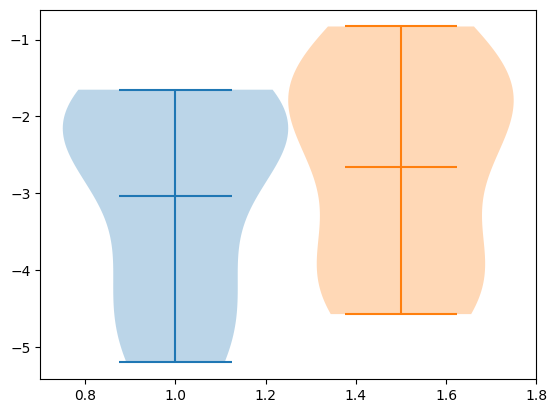

In [257]:
plt.violinplot(bestfit_df['b2_g'],positions=[1],showmeans=True)
plt.violinplot(bestfit_df['b2_r'],positions=[1.5],showmeans=True)

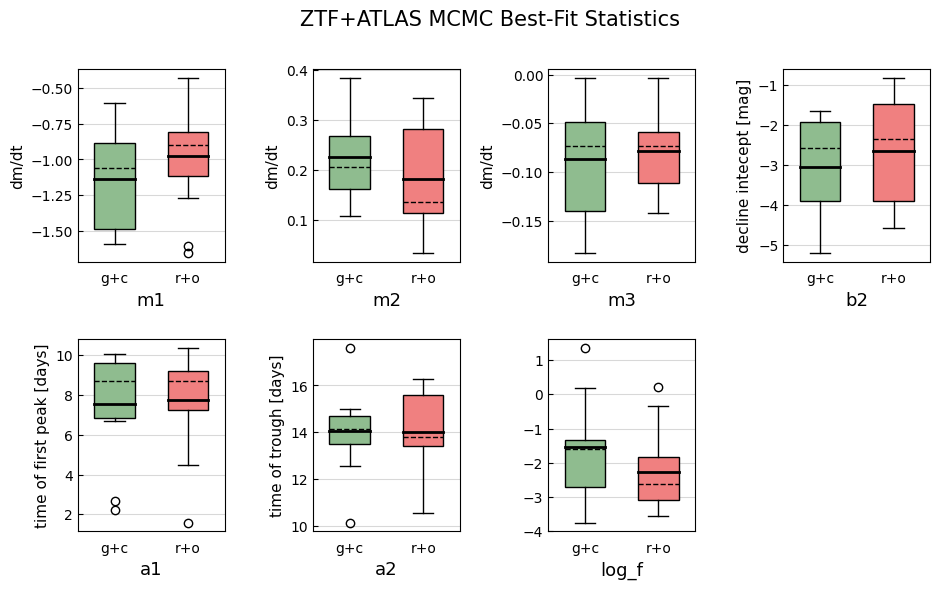

In [262]:
#making box and whisker plots and histograms
xlabels = ['m1', 'm2', 'm3', 'b2', 'a1', 'a2', 'log_f']
ylabels= ['dm/dt','dm/dt','dm/dt','decline intecept [mag]','time of first peak [days]', 'time of trough [days]']
labels = ['g+c','r+o']
boxprops = dict(linewidth=1.0, color='black')
medianprops = dict(linewidth=1.0, color='black', linestyle='--')
meanprops = dict(linewidth=2.0, color='black', linestyle='-')

def box_plot(data, loc=[0,0], label=labels, xlabel=xlabels):
    x1,x2 = loc[0],loc[1]
    bp = axs[x1,x2].boxplot(data, patch_artist=True,labels=label,boxprops=boxprops,medianprops=medianprops,meanprops=meanprops,widths=0.55, showmeans=True, meanline=True)
    colors = ['darkseagreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)  
    return bp

fig,axs = plt.subplots(2,4,figsize=(11,6))

box_plot([bestfit_df['m1_g'][bestfit_df['m1_g'].notna()],bestfit_df['m1_r'][bestfit_df['m1_r'].notna()]]
         ,loc=[0,0],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['m2_g'][bestfit_df['m2_g'].notna()],bestfit_df['m2_r'][bestfit_df['m2_r'].notna()]]
         ,loc=[0,1],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['m3_g'][bestfit_df['m3_g'].notna()],bestfit_df['m3_r'][bestfit_df['m3_r'].notna()]]
         ,loc=[0,2],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['b2_g'][bestfit_df['b2_g'].notna()],bestfit_df['b2_r'][bestfit_df['b2_r'].notna()]]
         ,loc=[0,3],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['a1_g'][bestfit_df['a1_g'].notna()],bestfit_df['a1_r'][bestfit_df['a1_r'].notna()]]
         ,loc=[1,0],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['a2_g'][bestfit_df['a2_g'].notna()],bestfit_df['a2_r'][bestfit_df['a2_r'].notna()]]
         ,loc=[1,1],label=labels,xlabel=xlabels[0])
box_plot([bestfit_df['log_f_g'][bestfit_df['log_f_g'].notna()],bestfit_df['log_f_r'][bestfit_df['log_f_r'].notna()]]
         ,loc=[1,2],label=labels,xlabel=xlabels[0])
axs[1,3].axis("off")

axs[0,0].set_xlabel(xlabels[0],fontsize=13)
axs[0,1].set_xlabel(xlabels[1],fontsize=13)
axs[0,2].set_xlabel(xlabels[2],fontsize=13)
axs[0,3].set_xlabel(xlabels[3],fontsize=13)
axs[1,0].set_xlabel(xlabels[4],fontsize=13)
axs[1,1].set_xlabel(xlabels[5],fontsize=13)
axs[1,2].set_xlabel(xlabels[6],fontsize=13)

axs[0,0].set_ylabel(ylabels[0],fontsize=11)
axs[0,1].set_ylabel(ylabels[1],fontsize=11)
axs[0,2].set_ylabel(ylabels[2],fontsize=11)
axs[0,3].set_ylabel(ylabels[3],fontsize=11)
axs[1,0].set_ylabel(ylabels[4],fontsize=11)
axs[1,1].set_ylabel(ylabels[5],fontsize=11)

axs[0,0].tick_params(axis="y",direction="in")
axs[0,0].tick_params(axis="x",top=False,bottom=False)
axs[0,0].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,1].tick_params(axis="y",direction="in")
axs[0,1].tick_params(axis="x",top=False,bottom=False)
axs[0,1].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,2].tick_params(axis="y",direction="in")
axs[0,2].tick_params(axis="x",top=False,bottom=False)
axs[0,2].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[0,3].tick_params(axis="y",direction="in")
axs[0,3].tick_params(axis="x",top=False,bottom=False)
axs[0,3].yaxis.grid(color='gray',alpha=0.3, linestyle='-')

axs[1,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="x",top=False,bottom=False)
axs[1,0].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[1,1].tick_params(axis="y",direction="in")
axs[1,1].tick_params(axis="x",top=False,bottom=False)
axs[1,1].yaxis.grid(color='gray',alpha=0.3, linestyle='-')
axs[1,2].tick_params(axis="y",direction="in")
axs[1,2].tick_params(axis="x",top=False,bottom=False)
axs[1,2].yaxis.grid(color='gray',alpha=0.3, linestyle='-')


fig.subplots_adjust(hspace=0.4,wspace=0.6)
fig.suptitle('ZTF+ATLAS MCMC Best-Fit Statistics', fontsize=15)
plt.savefig(SAVE_DIR+'figures/boxwhisk_params_may1.png')

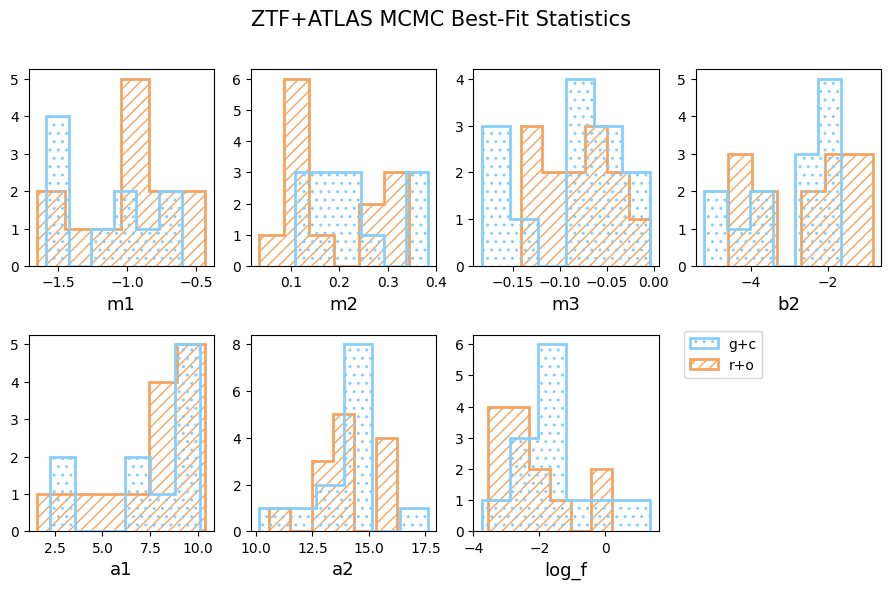

In [249]:
fig,axs = plt.subplots(2,4,figsize=(11,6))
a=1.0
b=6
ht='step' #'stepfilled'
lw=2
h1='..'
h2='///'
z1=10
z2=0
c1='lightskyblue' #'darkseagreen'
c2='sandybrown' #'lightcoral'

axs[0,0].hist(bestfit_df['m1_g'][bestfit_df['m1_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[0,0].hist(bestfit_df['m1_r'][bestfit_df['m1_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[0,1].hist(bestfit_df['m2_g'][bestfit_df['m2_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[0,1].hist(bestfit_df['m2_r'][bestfit_df['m2_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[0,2].hist(bestfit_df['m3_g'][bestfit_df['m3_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[0,2].hist(bestfit_df['m3_r'][bestfit_df['m3_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[0,3].hist(bestfit_df['b2_g'][bestfit_df['b2_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[0,3].hist(bestfit_df['b2_r'][bestfit_df['b2_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[1,0].hist(bestfit_df['a1_g'][bestfit_df['a1_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[1,0].hist(bestfit_df['a1_r'][bestfit_df['a1_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[1,1].hist(bestfit_df['a2_g'][bestfit_df['a2_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[1,1].hist(bestfit_df['a2_r'][bestfit_df['a2_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[1,2].hist(bestfit_df['log_f_g'][bestfit_df['log_f_g'].notna()],bins=b,histtype=ht,color=[c1],label=['g+c'],linewidth=lw,alpha=a,hatch=h1,zorder=z1)
axs[1,2].hist(bestfit_df['log_f_r'][bestfit_df['log_f_r'].notna()],bins=b,histtype=ht,color=[c2],label=['r+o'],linewidth=lw,alpha=a, hatch=h2,zorder=z2)

axs[1,3].axis("off")

axs[0,0].set_xlabel(xlabels[0],fontsize=13)
axs[0,1].set_xlabel(xlabels[1],fontsize=13)
axs[0,2].set_xlabel(xlabels[2],fontsize=13)
axs[0,3].set_xlabel(xlabels[3],fontsize=13)
axs[1,0].set_xlabel(xlabels[4],fontsize=13)
axs[1,1].set_xlabel(xlabels[5],fontsize=13)
axs[1,2].set_xlabel(xlabels[6],fontsize=13)

fig.subplots_adjust(hspace=0.35,wspace=0.2)
fig.suptitle('ZTF+ATLAS MCMC Best-Fit Statistics',fontsize=15)
handles, labels = axs[1,2].get_legend_handles_labels()
axs[1,2].legend(handles, labels, loc='center left', bbox_to_anchor=(1.1, 0.9))
# plt.savefig(SAVE_DIR+'figures/hist_params_may1.png')

In [161]:
# MCMC FIT STATS
# best fit goes in order of: m1,m2,m3,b2,a1,a2,logf
def comp_stats(values,val=''):
    minv = min(values)
    p25 = np.percentile(values, 25)
    p50 = np.percentile(values, 50)
    mean = np.mean(values)
    p75 = np.percentile(values, 75)
    maxv = max(values)
    std = np.std(values)
    # print('\033[1m'+val+': min,  25%,  med,  mean,  75%,  max,  std \033[0m \n', 
    #       round(minv,3),round(p25,3),round(p50,3),round(mean,3),round(p75,3),round(maxv,3,),round(std,3))#,'\n')
    return np.array([minv,p25,p50,mean,p75,maxv,std])

#computing the stats
stats_g, stats_r, stats_other = [],[],[]
for i in range(len(bestfit_df.columns[1:])):
    col = bestfit_df.columns[1:][i]
    if col[-2:] == '_g':
        g = comp_stats(bestfit_df[col],val=col)
        stats_g.append(g)
    elif col[-2:] == '_r':
        r = comp_stats(bestfit_df[col],val=col)
        stats_r.append(r)
    else: 
        o = comp_stats(bestfit_df[col],val=col)
        stats_other.append(o)
    
#saving to df 
stats_col = ['min','p25','med','mean','p75','max','std']
stats_df = pd.DataFrame(columns=stats_col, data=stats_g)
stats_df_r = pd.DataFrame(columns=stats_col, data=stats_r)
stats_df_other = pd.DataFrame(columns=stats_col, data=stats_other)
stats_df = pd.concat([stats_df,stats_df_r],ignore_index=True)
stats_df= pd.concat([stats_df,stats_df_other],ignore_index=True)
stats_df.insert(0, 'param', ['m1', 'm2', 'm3', 'b2', 'a1', 'a2', 'log_f']*2 + list(bestfit_df.columns[15:]))
stats_df['filter'] = ['g']*len(stats_g) + ['r']*len(stats_r) + ['both']*len(bestfit_df.columns[15:])
stats_df.to_csv(SAVE_DIR+'/mcmc_bestfit_stats_may1.csv')
stats_df

,param,min,p25,med,mean,p75,max,std,filter
0,m1,-1.589472,NaN,NaN,-1.133454,NaN,-0.606980,0.347628,g
1,m2,0.107934,0.162317,0.206177,0.226933,0.268554,0.382998,0.086845,g
2,m3,-0.183369,-0.140359,-0.073015,-0.086900,-0.049146,-0.003755,0.053831,g
3,b2,-5.203419,-3.904050,-2.579680,-3.037205,-1.933101,-1.651887,1.260121,g
4,a1,2.241731,NaN,NaN,7.527963,NaN,10.071302,2.740192,g
5,a2,10.158979,13.527217,14.163972,14.063574,14.717309,17.606733,1.612681,g
6,log_f,-3.746322,-2.701529,-1.598560,-1.542564,-1.329173,1.364686,1.300281,g
7,m1,-1.653940,-1.115765,-0.901983,-0.974564,-0.805282,-0.433238,0.349581,r
8,m2,0.034754,0.115683,0.137601,0.182365,0.282817,0.343726,0.095023,r
9,m3,-0.141956,-0.111153,-0.073302,-0.078900,-0.059142,-0.003679,0.040619,r


In [ ]:
# NEED TO REWORK SINCE DONT HAVE ALL_FITS_G/R LOCALLY STORED, ONLY THE TABLE OF BESTFIT VALUES
# ▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼

NameError: name 'all_fits_g' is not defined

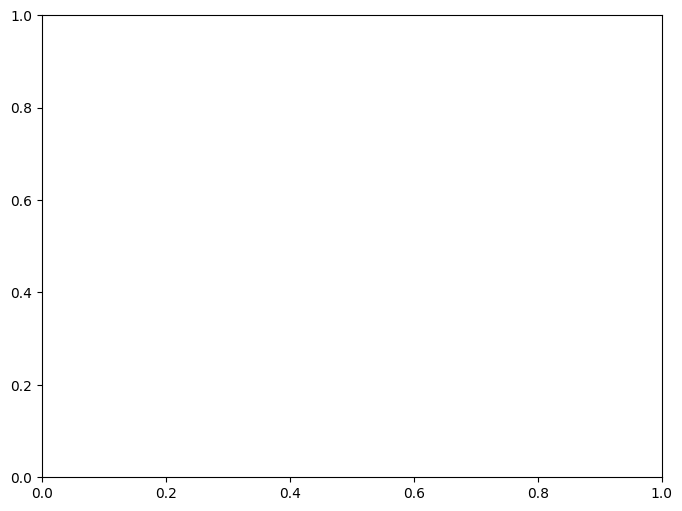

In [124]:
# PLOTTING THE MEAN FIT OVER THE BESTFITS
mean_x = np.arange(-3,25,0.001)

a1s,a2s = [],[]
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    g_df = df[(df['filter']=='ZTF_g') | (df['filter']=='c')]
    x_plt = np.arange(min(g_df['norm_t']),max(g_df['norm_t']),0.01)

    best = np.array(all_fits_g[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_g[i]).T[0] - np.array(all_fits_g[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_g[i]).T[0] + np.array(all_fits_g[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_g_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=0.7, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_g_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='gray', alpha=0.05)
    
    # #plotting ztf/atlas data
    x,y,yerr = np.array(g_df['norm_t']),np.array(g_df['norm_m']),np.array(g_df['mag_err_all'])
    # plt.errorbar(x, y, yerr, linestyle='', marker='.', color='black', alpha=0.04, label='data', markersize=15) #ztf errors

#overall mean best fit
mean_fit_g = stats_df[stats_df['filter']=='g']['mean']
lower_mean =  np.array([model(stats_df[stats_df['filter']=='g']['mean']-stats_df[stats_df['filter']=='g']['std'],v,r1=True) for v in mean_x])
upper_mean =  np.array([model(stats_df[stats_df['filter']=='g']['mean']+stats_df[stats_df['filter']=='g']['std'],v,r1=True) for v in mean_x])
plt.plot(mean_x, np.array([model(mean_fit_g, v, r1=True) for v in mean_x]),c='black', label='Mean Best Fit', alpha=1.0, linewidth=5.0)
plt.fill_between(mean_x, lower_mean, upper_mean, color='gray', alpha=0.15)

mean_a1_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean'])
# lower_a1_g, upper_a1_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std']
mean_a2_g = float(stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean'])
# lower_a2_g, upper_a2_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std']
# plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
# plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(mean_a1_g,alpha=0.4, color='black', linestyle='dashed', linewidth=5, label='Mean a1', zorder=1)
plt.axvline(mean_a2_g,alpha=0.4, color='black', linestyle='solid', linewidth=5, label='Mean a2', zorder=1)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Mean Best Fit for all g-band SNe')
plt.ylim(4,-3)
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/mean_mcmc_fits_g_april23.png')

4.981712899636477 24.91171289963605


NameError: name 'all_fits_r' is not defined

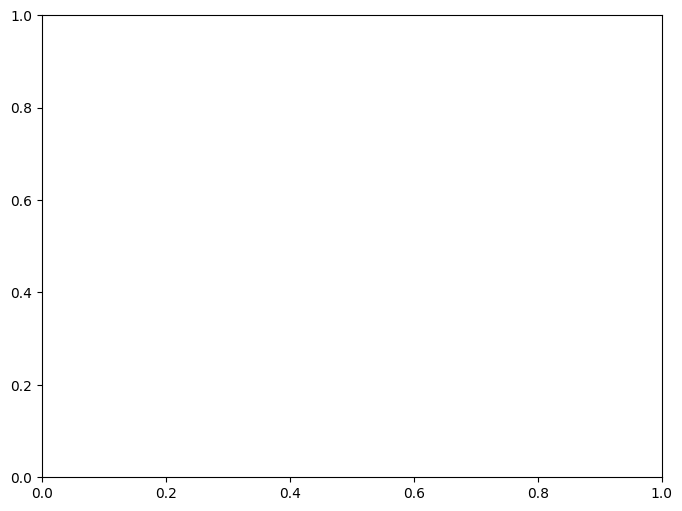

In [125]:
mean_x = np.arange(-7,25,0.01)

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
ax = plt.subplot(111)
for i,df in enumerate(df_sub_ls):
    r_df = df[(df['filter']=='ZTF_r') | (df['filter']=='o')]
    x_plt = np.arange(min(r_df['norm_t']),max(r_df['norm_t']),0.01)
    print(min(x_plt),max(x_plt))

    best = np.array(all_fits_r[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_r[i]).T[0] - np.array(all_fits_r[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_r[i]).T[0] + np.array(all_fits_r[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_r_bools[i]) for v in x_plt]), c=colors[i], label=df_str_list[i], alpha=0.9, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_r_bools[i]) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.2)

    #plotting ztf data
    x,y,yerr = np.array(r_df['norm_t']),np.array(r_df['norm_m']),np.array(r_df['mag_err_all'])
    # plt.errorbar(x, y, yerr, linestyle='', marker='.', color='gray', alpha=0.05, label='data', markersize=15) #ztf errors, 

#overall mean best fit
mean_fit_r = stats_df[stats_df['filter']=='r']['mean']
lower_mean =  np.array([model(stats_df[stats_df['filter']=='r']['mean']-stats_df[stats_df['filter']=='r']['std'],v,r1=True) for v in mean_x])
upper_mean =  np.array([model(stats_df[stats_df['filter']=='r']['mean']+stats_df[stats_df['filter']=='r']['std'],v,r1=True) for v in mean_x])
plt.plot(mean_x, np.array([model(mean_fit_r, v, r1=True) for v in mean_x]),c='black', label='Mean Best Fit', alpha=1.0, linewidth=5.0)
plt.fill_between(mean_x, lower_mean, upper_mean, color='gray', alpha=0.15)

mean_a1_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a1']['mean'])
# lower_a1_g, upper_a1_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a1']['std']
mean_a2_r = float(stats_df[stats_df['filter']=='r'].loc[stats_df['param']=='a2']['mean'])
# lower_a2_g, upper_a2_g = stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']-stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std'], stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['mean']+stats_df[stats_df['filter']=='g'].loc[stats_df['param']=='a2']['std']
# plt.axvspan(min_a1, max_a1, alpha=0.03, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
# plt.axvspan(min_a2, max_a2, alpha=0.03, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(mean_a1_r,alpha=0.4, color='black', linestyle='dashed', linewidth=5, label='Mean a1', zorder=1)
plt.axvline(mean_a2_r,alpha=0.4, color='black', linestyle='solid', linewidth=5, label='Mean a2', zorder=1)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Mean Best Fit for all r-band SNe')
plt.ylim(6,-3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(SAVE_DIR+'/figures/mean_mcmc_fits_r_april23.png')

In [126]:
def compare_bestfits(fp_mean, fp_std, alert_mean, alert_std, param_name='str', band='str'):
    fig, ax = plt.subplots(1,1, figsize=(2,4)) 
    if band=='g':
        colors=['seagreen', 'mediumseagreen', 'palegreen']
    if band=='r':
        colors=['lightcoral', 'orange', 'gold']
    ax.scatter(1, fp_mean, color='black', marker='o',zorder=4, s=75)
    ax.vlines(1, ymin=fp_mean-fp_std, ymax=fp_mean+fp_std, color=colors[0], linewidth=6, zorder=2, label='1sigma')
    ax.vlines(1, ymin=fp_mean-(2*fp_std), ymax=fp_mean+(2*fp_std), color=colors[1], linewidth=6, zorder=1, label='2sigma')
    ax.vlines(1, ymin=fp_mean-(3*fp_std), ymax=fp_mean+(3*fp_std), color=colors[2], linewidth=6, zorder=0, label='3sigma')

    ax.scatter(2, alert_mean, color='black', marker='o',zorder=4, s=75)
    ax.vlines(2, ymin=alert_mean-alert_std, ymax=alert_mean+alert_std, color=colors[0], linewidth=6, zorder=2)
    ax.vlines(2, ymin=alert_mean-(2*alert_std), ymax=alert_mean+(2*alert_std), color=colors[1], linewidth=6, zorder=1)
    ax.vlines(2, ymin=alert_mean-(3*alert_std), ymax=alert_mean+(3*alert_std), color=colors[2], linewidth=6, zorder=0)

    ax.set_xlim(0.25,2.75)
    x_ticks_labels = ['FP+Alert', 'Alert']
    ax.set_xticks([1,2])
    ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=11)
    ax.set_ylabel(param_name, fontsize=13)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(band+'-band MCMC comparisons for '+param_name)
    return

In [98]:
# compare_bestfits(-1.154, 0.330, -0.721, 0.125, param_name='m1', band='g')
# compare_bestfits(0.209, 0.0611, 0.195, 0.0756, param_name='m2', band='g')
# compare_bestfits(-0.100, 0.0515, -0.100, 0.0630, param_name='m3', band='g')

In [97]:
# compare_bestfits(-1.003, 0.390, -0.686, 0.115, param_name='m1', band='r')
# compare_bestfits(0.179, 0.0884, 0.205, 0.104, param_name='m2', band='r')
# compare_bestfits(-0.0875, 0.0384, -0.0830, 0.0393,  param_name='m3', band='r')